# Tutorial 7: Linear regression and graph plotting
This tutorial provides further examples for linear regression and graph plotting, supplementing lecture materials.

### 7.1 Review of linear regression
Linear regression is a statistical technique that finds the linear relationship between two continuous variables. \
In a linear regression, the two variables in each sample follows the same equation in follows:
$$ Y_i = a + b X_i + \epsilon_i $$
where $X_i$ and $Y_i$ represents the two variables in sample $i$. Estimated parameters are $a$ (intercept coefficient) and $b$ (slope coefficient). $\epsilon_i$ captures the residual of sample $i$. \
If the regression model is valid, we may predict the value of $Y$ in a sample by putting its known value of $X$ into linear regression. The predicted value of $Y$ is given as follows:
$$ \hat{Y_i} = a + b X_i$$
The residual term $\epsilon_i$ can be interpreted as difference of actual $Y_i$ and the predicted value $\hat{Y_i}$, which should follow normal distribution with mean 0.\
The following code represents a case of simple linear regression in Python. 

In [10]:
import pandas as pd
import statsmodels.api as sm

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [23]:
#The following regression model finds how the index price depends on the unemployment rate in each month.
x1 = df['unemployment_rate']
y = df['index_price']

x1 = sm.add_constant(x1)

model1 = sm.OLS(y, x1).fit()
predictions1 = model1.predict(x1) 

print_model1 = model1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.95e-11
Time:                        23:11:09   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -99.4643     95.210     -1.045

In [24]:
print(model1.params)

const                4471.339321
unemployment_rate    -588.962076
dtype: float64


In [25]:
intercept = model1.params.iloc[0] #intercept term
slope = model1.params.iloc[1] #slope coefficient for unemployment
print(f"The predicted index price falls by {round(-slope, 2)} per percentage point increase in unemployment rate.")
print(f"The predicted index price is {round(intercept, 2)} if unemployment rate is zero.")

The predicted index price falls by 588.96 per percentage point increase in unemployment rate.
The predicted index price is 4471.34 if unemployment rate is zero.


In this OLS regression model, the predicted index price $\hat{Y_i}$ is estimated as $4471.34 - 588.96 X_i$, where $X_i$ is the unemployment rate for month $i$. \
Coefficients are estimated in a way such that the sum of squared residuals $\sum_i (Y_i - \hat{Y_i})^2$ from all samples is minimized.

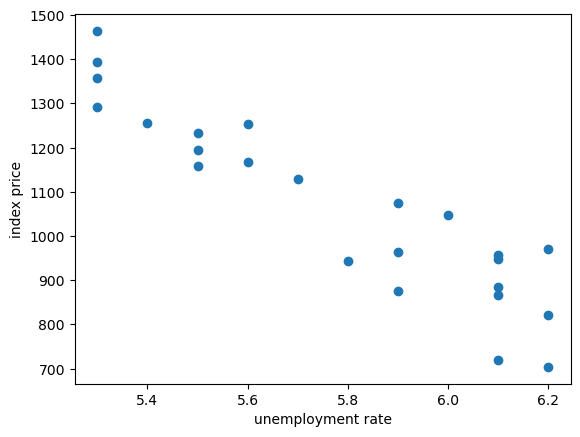

In [26]:
#scatter plot of index price against unemployment rate
import matplotlib.pyplot as plt
plt.scatter(df['unemployment_rate'], df['index_price'])
plt.xlabel("unemployment rate")
plt.ylabel("index price")
plt.show()

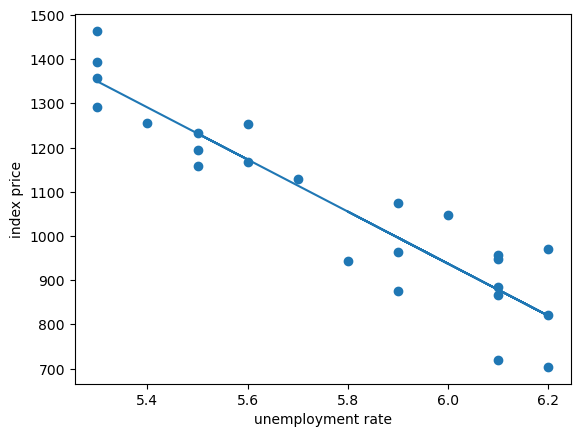

In [28]:
#Plot showing regression best fit line together with scatter plot
plt.scatter(df['unemployment_rate'], df['index_price'])
plt.plot(df['unemployment_rate'], predictions1)
plt.xlabel("unemployment rate")
plt.ylabel("index price")
plt.show()

### 7.2 Another case of linear regression
In this example, we regress index price against interest rate.

In [29]:
x2 = df['interest_rate']
y = df['index_price']

x2 = sm.add_constant(x2)

model2 = sm.OLS(y, x2).fit()
predictions2 = model2.predict(x2) 

print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.95e-11
Time:                        23:13:16   Log-Likelihood:                -136.94
No. Observations:                  24   AIC:                             277.9
Df Residuals:                      22   BIC:                             280.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -99.4643     95.210     -1.045

In [30]:
print(model2.params)

const            -99.464319
interest_rate    564.203892
dtype: float64


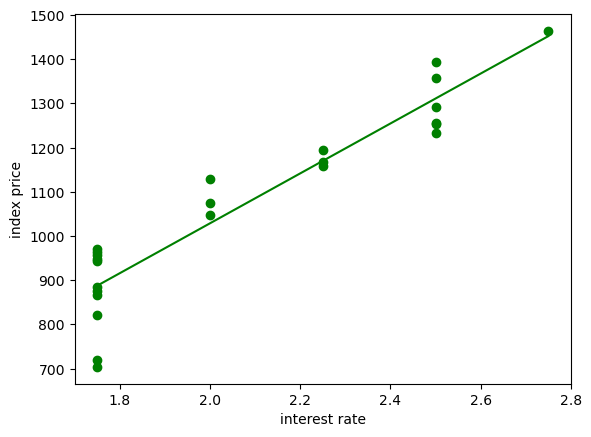

In [35]:
#Plot showing regression best fit line together with scatter plot
plt.scatter(df['interest_rate'], df['index_price'], c="g")
plt.plot(df['interest_rate'], predictions2, "g")
plt.xlabel("interest rate")
plt.ylabel("index price")
plt.show()

### 7.3 Histogram
The following example shows a plot of histogram with distribution of index prices.

(array([2., 1., 3., 5., 2., 2., 3., 3., 1., 2.]),
 array([ 704.,  780.,  856.,  932., 1008., 1084., 1160., 1236., 1312.,
        1388., 1464.]),
 <BarContainer object of 10 artists>)

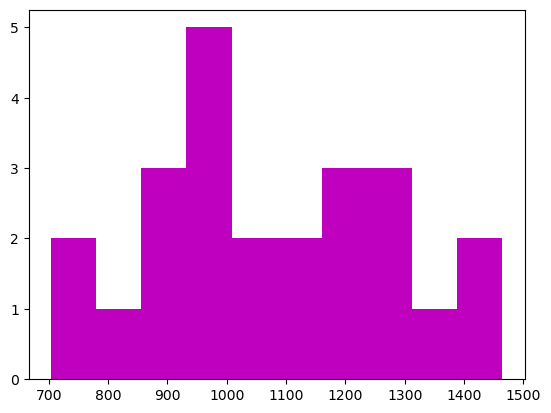

In [49]:
#create histogram with 10 bins, boundaries set automatically such that all bins have the same width
plt.hist(df['index_price'],bins=10,color="m")

(array([2., 4., 5., 2., 4., 4., 2., 1.]),
 array([ 700.,  800.,  900., 1000., 1100., 1200., 1300., 1400., 1500.]),
 <BarContainer object of 8 artists>)

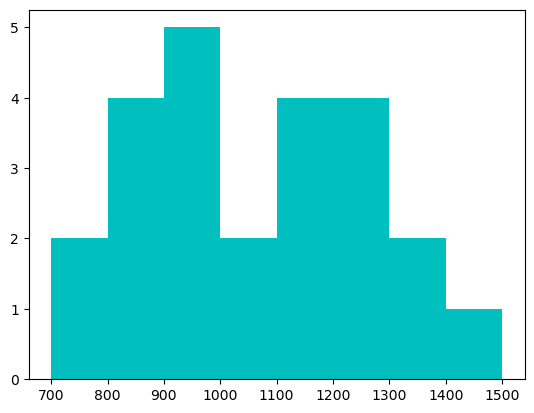

In [48]:
#create histogram with self defined bin boundaries. 
plt.hist(df['index_price'],bins=range(700,1600,100),color="c")

### 7.4 Exercises
1. Put the regression plots in session 7.1 and session 7.2 together in a single plot, with unemployment rate subplot on the left and interest rate subplot on the right. 
2. For the plot generated in Part 1, add the title "Index price 2016-2017".
3. Create a new line chart with index price and interest rate plotted against time. X-axis label should consist of year-month code from `201601` to `201712`. 